In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from scipy.linalg import svd
from matplotlib.pyplot import *
%matplotlib widget

In [4]:
import sys
sys.path.append("../../")

import numerical_methods as Sim

# Initiate Solver

In [5]:
shape = (200,200)
filter_radius = 20

PELMSim = Sim.PELM_algsolver(shape, filter_radius)

# Prepare Features

In [20]:
F = 5
f = np.linspace(0,1,F)

feature_points = np.reshape(np.array(np.meshgrid(f, f)), (2, F*F))

#feature_points = np.zeros((2, 2*F, 1))
#feature_points[0,:F,0] = f
#feature_points[1,F:,0] = f

# Config
SLM_encoding_shape = (10,10)
DMD_encoding_shape = (20,20)

# Generate Input Masks

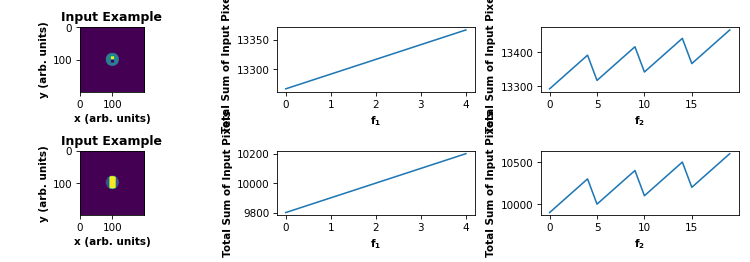

In [26]:
## Generate Input Profiles
SLM_input_masks = Sim.ContinuosFeatures(f, f, SLM_encoding_shape, shape, ref=1/3)  ## More types of encodings on the masks.py file

DMD_input_masks = Sim.TwoFEncodings

indices = np.arange(2*DMD_encoding_shape[0]*DMD_encoding_shape[1])  ## reading order indices
DMD_input_masks = Sim.TwoFEncodings(feature_points[:,:], indices, mpx=(2, 2), encoding_shape=DMD_encoding_shape, DMD_shape=shape, ref_stride=2, shift=(0,0))

fig, axs = subplots(2, 3, figsize=(10,3.5))
axs[0,0].imshow(SLM_input_masks[3]*PELMSim.filter)
axs[0,0].set_title("Input Example", weight="bold")

axs[0,0].set_xlabel("x (arb. units)", weight="bold")
axs[0,0].set_ylabel("y (arb. units)", weight="bold")

axs[0,1].plot(np.sum(SLM_input_masks[:F], axis=(1,2)))
axs[0,1].set_xlabel(r"$\mathbf{f_1}$")
axs[0,1].set_ylabel("Total Sum of Input Pixels", weight="bold")

axs[0,2].plot(np.sum(SLM_input_masks[F:], axis=(1,2)))
axs[0,2].set_xlabel(r"$\mathbf{f_2}$")
axs[0,2].set_ylabel("Total Sum of Input Pixels", weight="bold")

axs[1,0].imshow(DMD_input_masks[-1]*PELMSim.filter)
axs[1,0].set_title("Input Example", weight="bold")

axs[1,0].set_xlabel("x (arb. units)", weight="bold")
axs[1,0].set_ylabel("y (arb. units)", weight="bold")

axs[1,1].plot(np.sum(DMD_input_masks[:F], axis=(1,2)))
axs[1,1].set_xlabel(r"$\mathbf{f_1}$")
axs[1,1].set_ylabel("Total Sum of Input Pixels", weight="bold")

axs[1,2].plot(np.sum(DMD_input_masks[F:], axis=(1,2)))
axs[1,2].set_xlabel(r"$\mathbf{f_2}$")
axs[1,2].set_ylabel("Total Sum of Input Pixels", weight="bold")


fig.tight_layout()

# Simulate

In [27]:
SLM_hidden_features = PELMSim.solver(SLM_input_masks, normed=True, noise=0)

DMD_hidden_features = PELMSim.solver(DMD_input_masks, normed=True, noise=0)


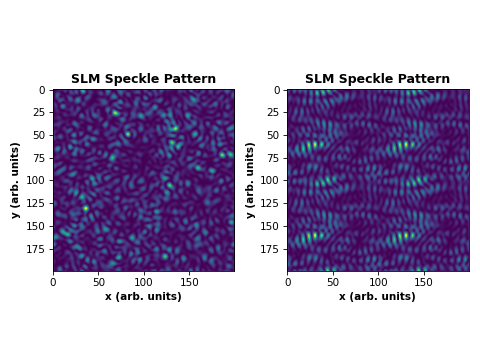

In [28]:
fig, axs = subplots(1, 2)
axs[0].imshow(SLM_hidden_features[0])

axs[0].set_title("SLM Speckle Pattern", weight="bold")

axs[0].set_xlabel("x (arb. units)", weight="bold")
axs[0].set_ylabel("y (arb. units)", weight="bold")

axs[1].imshow(DMD_hidden_features[0])

axs[1].set_title("SLM Speckle Pattern", weight="bold")

axs[1].set_xlabel("x (arb. units)", weight="bold")
axs[1].set_ylabel("y (arb. units)", weight="bold")

fig.tight_layout()

# Dataset Rank

In [29]:
SLM_svds = Sim.Compute_Rank(np.reshape(SLM_hidden_features, (F**2, *shape)), compute_uv=False)
DMD_svds = Sim.Compute_Rank(np.reshape(DMD_hidden_features, (F**2, *shape)), compute_uv=False)

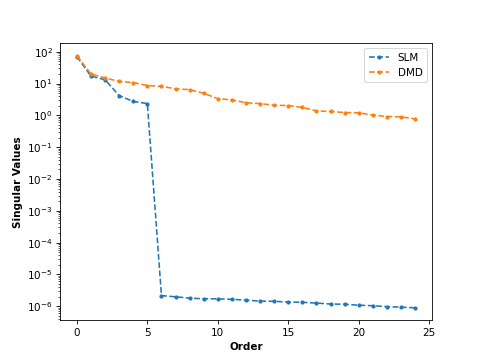

In [30]:
fig, axs = subplots(1)
axs.plot(SLM_svds, "--", marker=".", label="SLM")
axs.plot(DMD_svds, "--", marker=".", label="DMD")

axs.set_yscale("log")
axs.set_ylabel("Singular Values", weight="bold")
axs.set_xlabel("Order", weight="bold")

axs.legend()

# Conclusion:

Comparing the singular values between the SLM (continuos embedding) and the DMD (discrete embedding) we obtain the spatial discretization occurring in the DMD raises the dimensionality of the output space. Naturally, looking to process information in a methodology where the PELM is used as a replacement for a processor we can explore such a discretization. Yet, looking to implement the PELM in an analogic methodlogy in an online metrology system, such dimensionality growth is not feasible. For this reason we conclude the DMD and SLM having a distinct and not interchangeable underlying processing capability.